In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 이 맷플롯립 인라인을 작성을 해주면 라인 바로 아래에 그림을 그려준다. 창을 띄우지 않고.
%matplotlib inline

In [2]:
df_train = pd.read_csv('../kaggle_study/kaggle_datasets/titanic/train.csv')
df_test = pd.read_csv('../kaggle_study/kaggle_datasets/titanic/test.csv')

In [3]:
df_train2 = pd.read_csv('../kaggle_study/kaggle_datasets/titanic/train.csv')

In [4]:
df_train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [10]:
df_train2['Fare'].iloc[:10]

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

In [11]:
df_train["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

# df_train['Cabin'].isnull().sum()/df_train['Cabin'].shape[0] * 100
<br>

### df_train['Cabin'].isnull()
이렇게 작성을 하면 df_train 안에 있는 Cabin column안에 있는 객체들 중에 null여부로 bool형 데이터 반환
<br>

### df_train['Cabin'].isnull().sum( )
그리고 .sum()을 해주면 이 반환된 bool형 배열들을 모두 더해준다. 

### df_train['Cabin'].shape[0]
이렇게 출력을 해주면 해당 열의 행렬의 형태를 출력을 해주는데 여기서 행렬의 행에 해당하는 0 idx를 뜻한다.

## 결론
그래서 df_train['Cabin'].isnull().sum( ) 여기서 구한 True(1) 값들의 합을 전체(True, False 모두 합침)를<br>
나눠 주고 100을 곱해주면 전체에서 null값의 비율을 알 수 있다. <br>
Cabin은 객실 정보.

In [12]:
df_train['Age'].isnull().sum()/df_train['Age'].shape[0] * 100

19.865319865319865

### misingno 라이브러리
아래와 같은 matrix를 만들 수 있다.<br><br>
iloc은 Index location이라는 pandas 언어. idx로 위치를 찾는거 그냥 파이썬의 인덱스라고 생각해도 괜찮다.<br>
loc은 location이라는 pandas 언어인데 (1,2) 이런식으로 위치를 찾는 것이 아니라 dictionary의 key값 처럼 라벨을 이용해서 불러오는 것이다.<br><br>

figsize는 아래 이미지의 사이즈를 정해주는 것이고 color는 색상을 정해주는 것.<br><br>

막대가 빈칸이 중간 중간에 보이는 것은 null값을 의미.

#### 아래와 같이 matrix가 아닌 bar를 이용해서도 dataset의 구성을 시각화할 수 있다.

<Axes: >

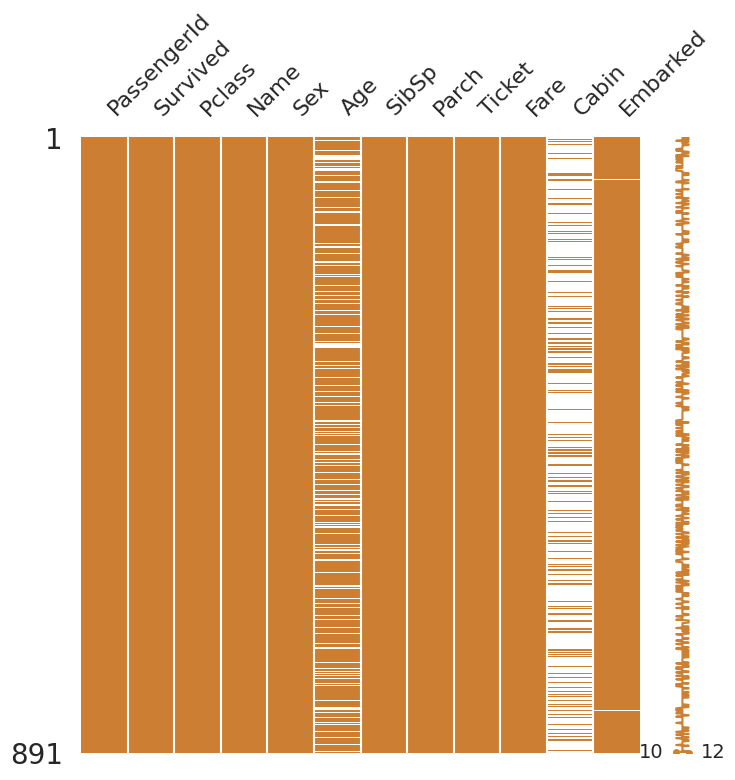

In [13]:
msno.matrix(df=df_train.iloc[:, :], figsize = (8,8), color=(0.8, 0.5, 0.2)) 


<Axes: >

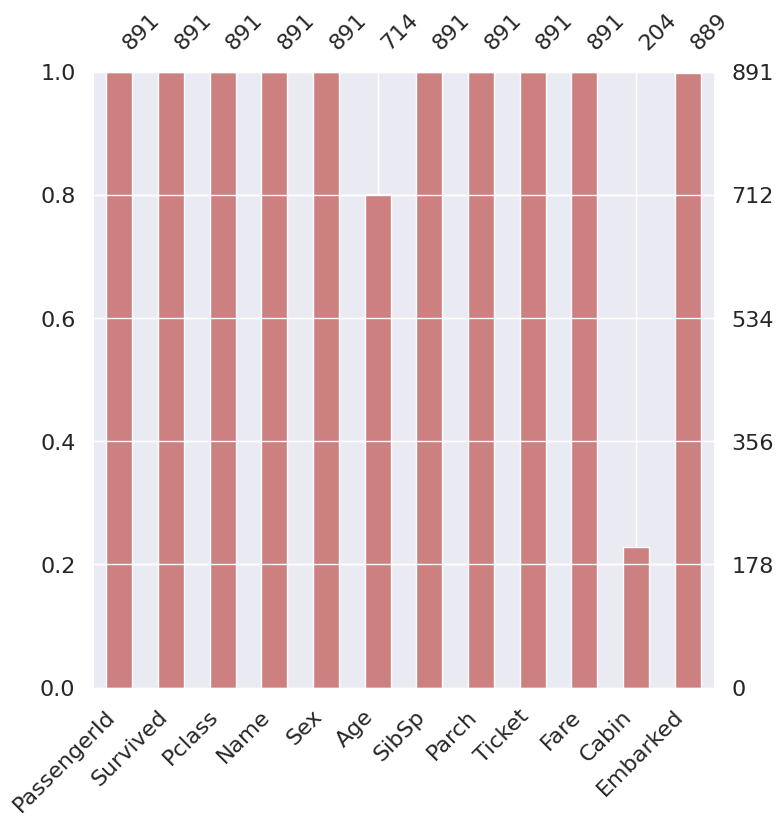

In [14]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.5))

### 아래 코드를 하나씩 살펴보자

#### 1번줄에 해당하는 코드는 그림을 그려줄 도화지를 하나 생성해주는 것이다.



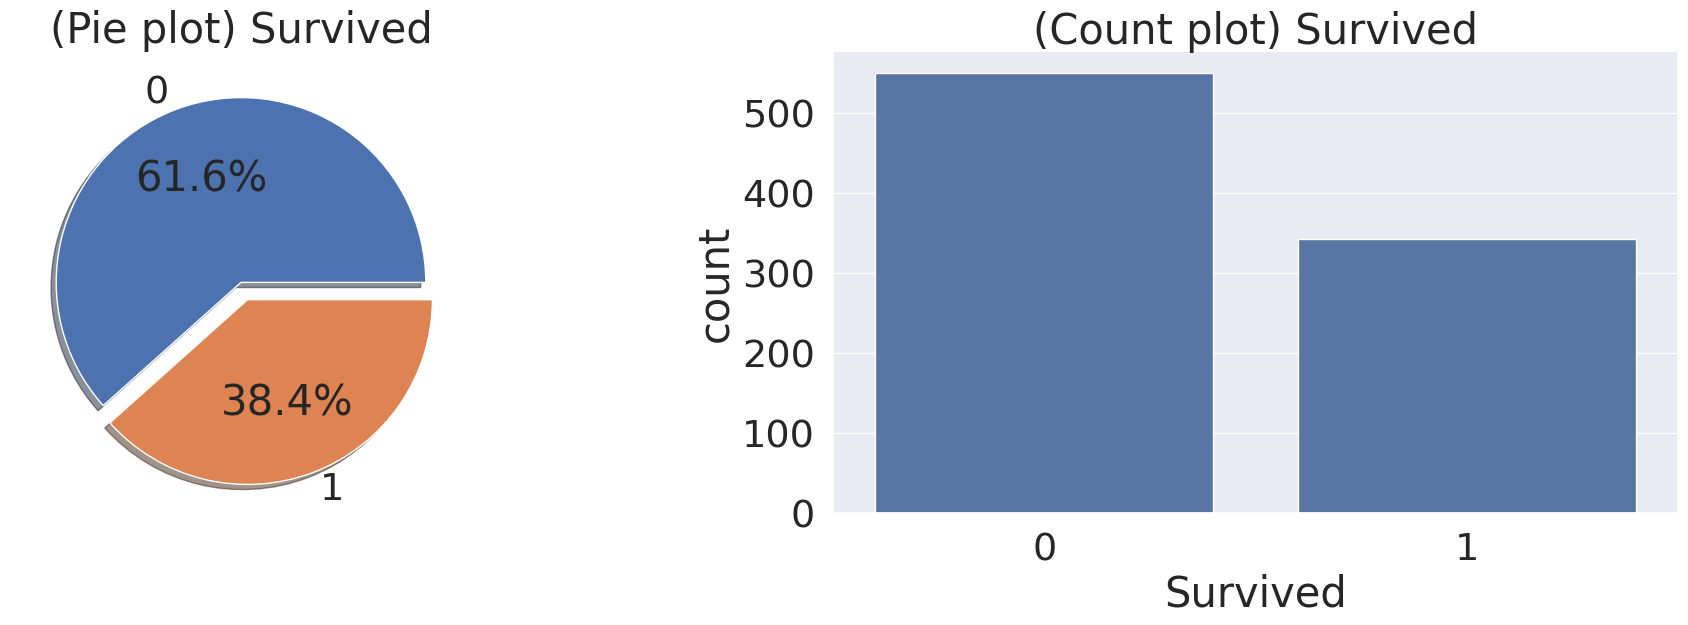

In [15]:
f, ax = plt.subplots(1,2, figsize=(24,6)) # figure 개체는 f에 저장을 하고, axes 개체는 ax에 저장을 하는 것이다. 그리고 앞에 1,2는 1행 2열의 서브플롯을 생성하는 것.
# 여기서 axes는 서브프롯을 나타내는 객체. 서브플롯을 저장하고 있는 배열이라고 생각해도 된다.
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%", ax = ax[0], shadow=True) # (실수형 포맷을 할 때에 작성해주는 1. 부분은 글씨 폭을 정해주는 것이다.)
# 위 코드에서 explode는 파이의 간격을 나타내는 것이다. 그리고 ax는 몇 번째 서브 플롯에 그림을 그려넣을 것인지 정하는 것이고, shadow는 플롯의 그림에 그림자를 그릴것인지 정하는 것이다.
# 그리고 autopct는 해당 데이터들을 더해서 자동으로 percent 데이터로 만들어 주는 함수다.
ax[0].set_title('(Pie plot) Survived') # 서브 플롯의 제목
ax[0].set_ylabel('') # y 레이블의 이름을 없애는 것이다.
sns.countplot(x = 'Survived', data = df_train, ax = ax[1]) # 서브플롯의 두번째 위치에 countplot 형태의 그래프를 그려넣은 것이다.
ax[1].set_title('(Count plot) Survived')
plt.show()

In [16]:
df_train['Survived'].value_counts() # value_counts는 각 개체별로 개수를 반환을 해줌.
# df_train['Survived'].count() # count는 해당열에 있는 모든 개체의 수를 반환을 해주는 것이다. 

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
type(df_train['Survived'].value_counts()) # 이 개체의 개수를 반환해주는 결과는 항상 series 형태로 반환을 해준다.

pandas.core.series.Series

<Axes: ylabel='count'>

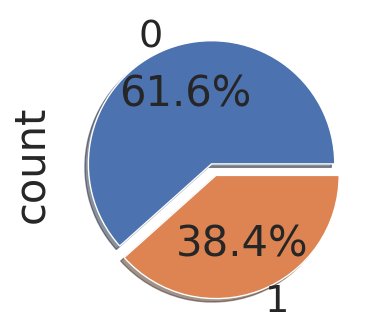

In [18]:
df_train['Survived'].value_counts().plot.pie(figsize=(8,4), shadow= True, autopct = '%1.1f%%', explode = [0,0.1])
#series의 특징은 plot을 갖고있다. 이렇게 plot을 해서 데이터를 시각화해서 볼 수 있다. (이건 pandas 기능 - matplotlib랑 연결할 수 있다.)
#plot뒤에는 이 그래프의 모양을 정해줄 수 있는데 <plot.pie()> 그림의 특징을 넣어줄 때는 plot이 끝나는 부분에 특징을 넣어주면 된다.

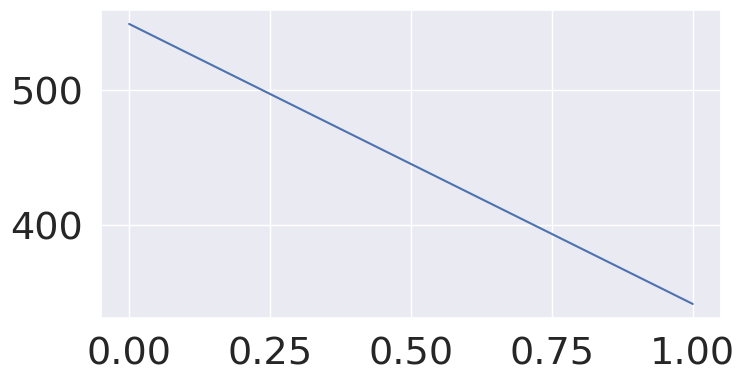

In [19]:
plt.figure(figsize=(8,4))
plt.plot(df_train['Survived'].value_counts()) 

In [20]:
df_train.shape # 이 결과를 보면 Survived(레이블)을 제외한 feature 11개를 얻었다.

(891, 12)

## 2.1 Pclass

In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum() 
# sum이랑 count의 차이는 count는 객체의 개수를 구하는 것이고 sum은 객체들의 value값들을 더한 값이다.

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='Pastel1')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

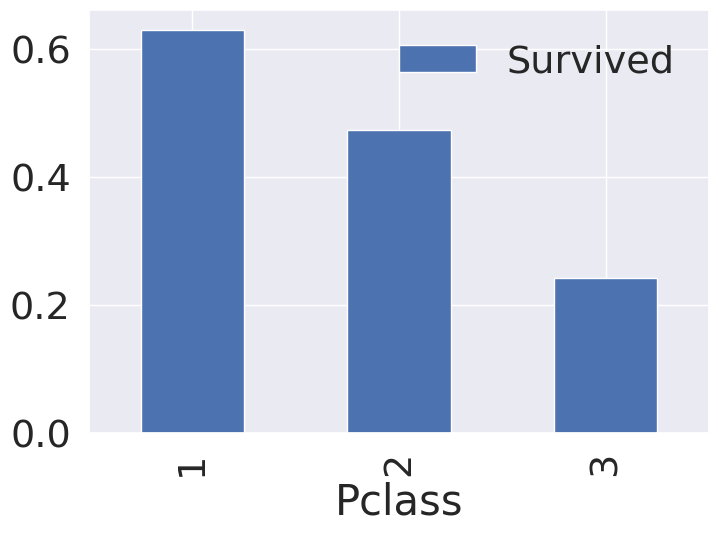

In [24]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

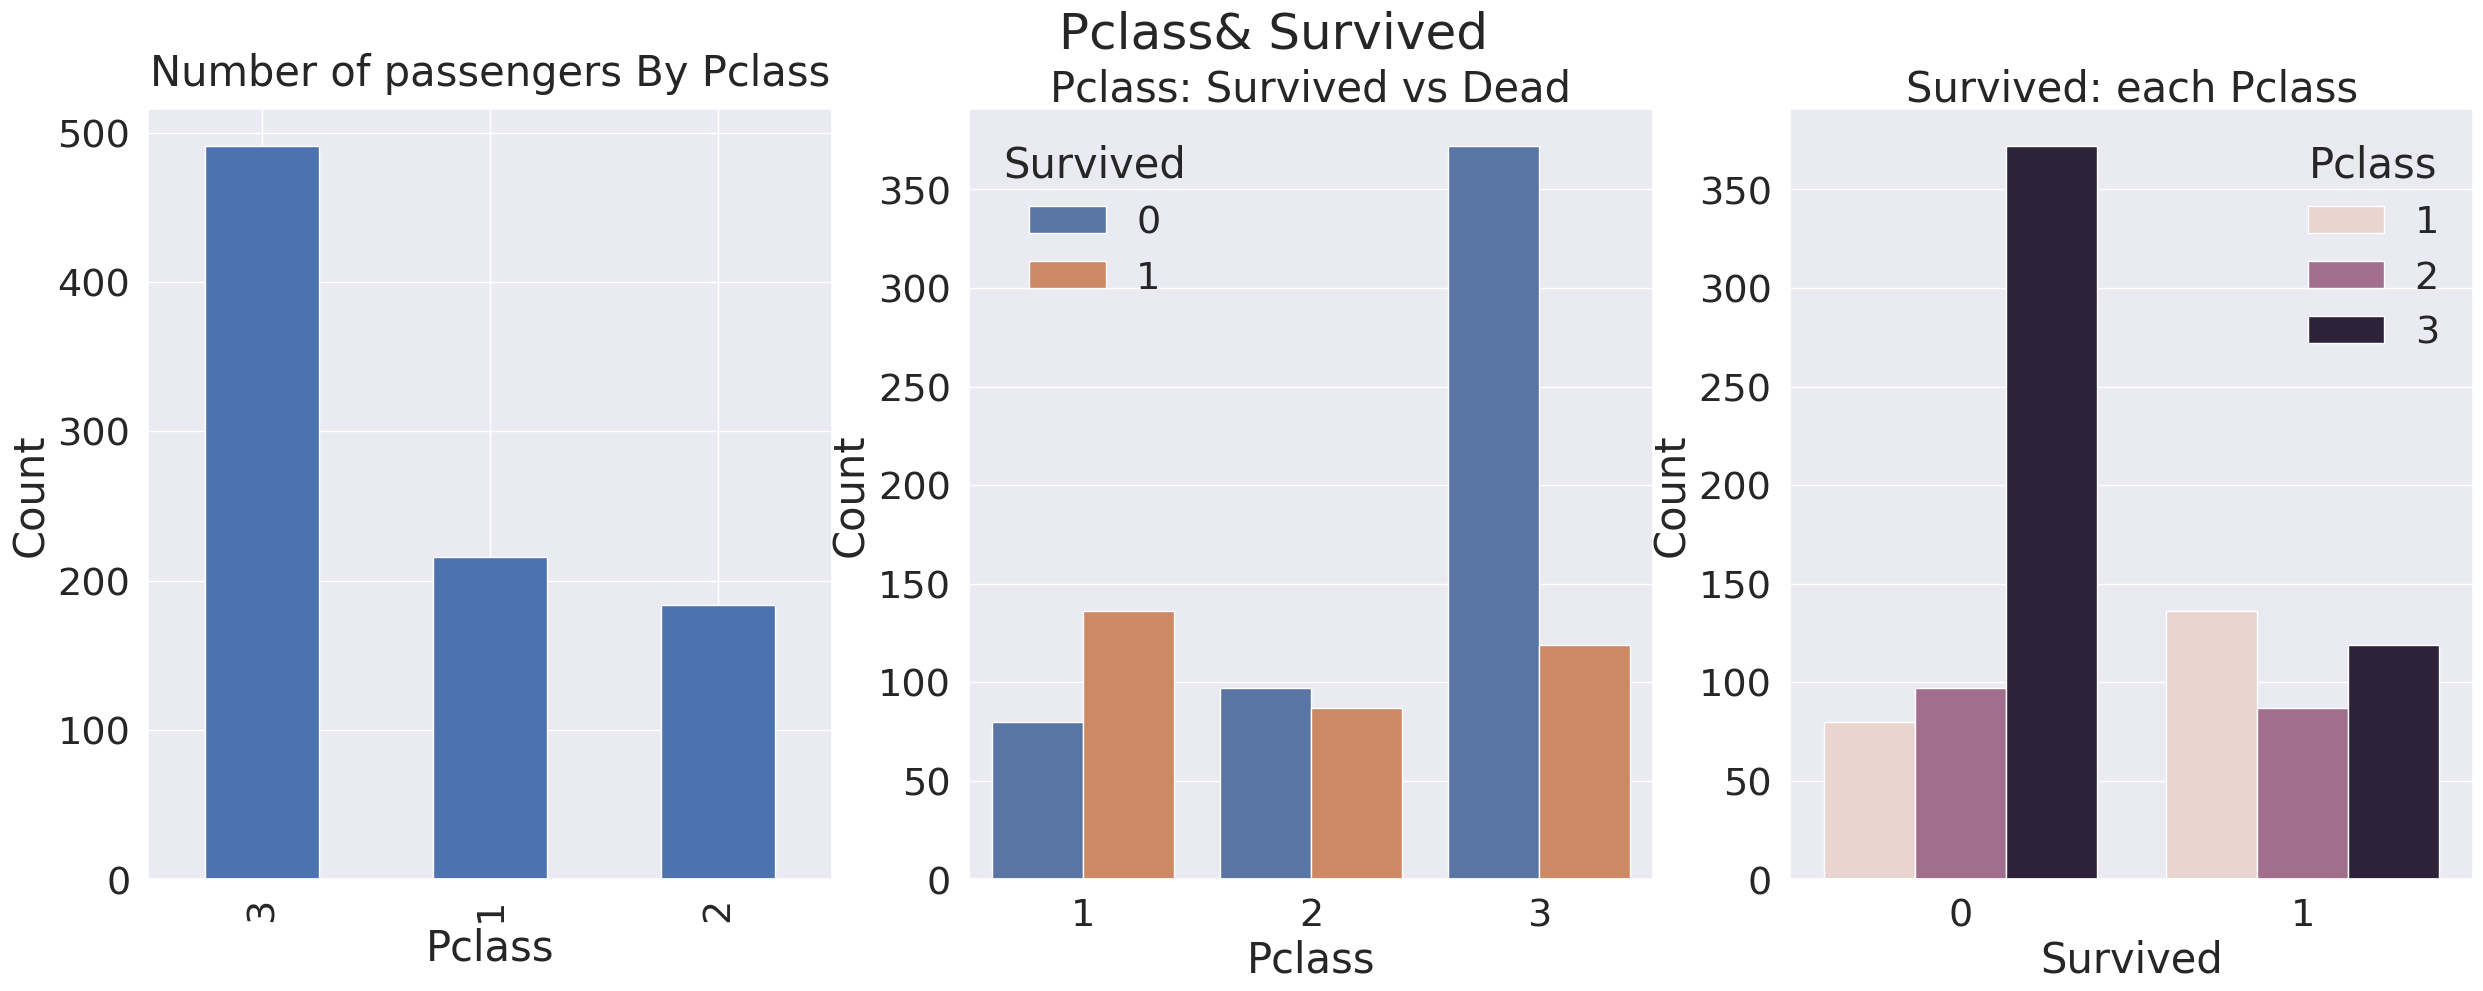

In [25]:
y_position = 1.02
f, ax = plt.subplots(1,3,figsize = (30,10))
df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue='Survived', data=df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
ax[1].set_ylabel('Count')
sns.countplot(x='Survived', hue="Pclass", data = df_train, ax = ax[2])
ax[2].set_title('Survived: each Pclass')
ax[2].set_ylabel('Count')
f.suptitle('Pclass& Survived')
plt.show()

## 2.2 성별

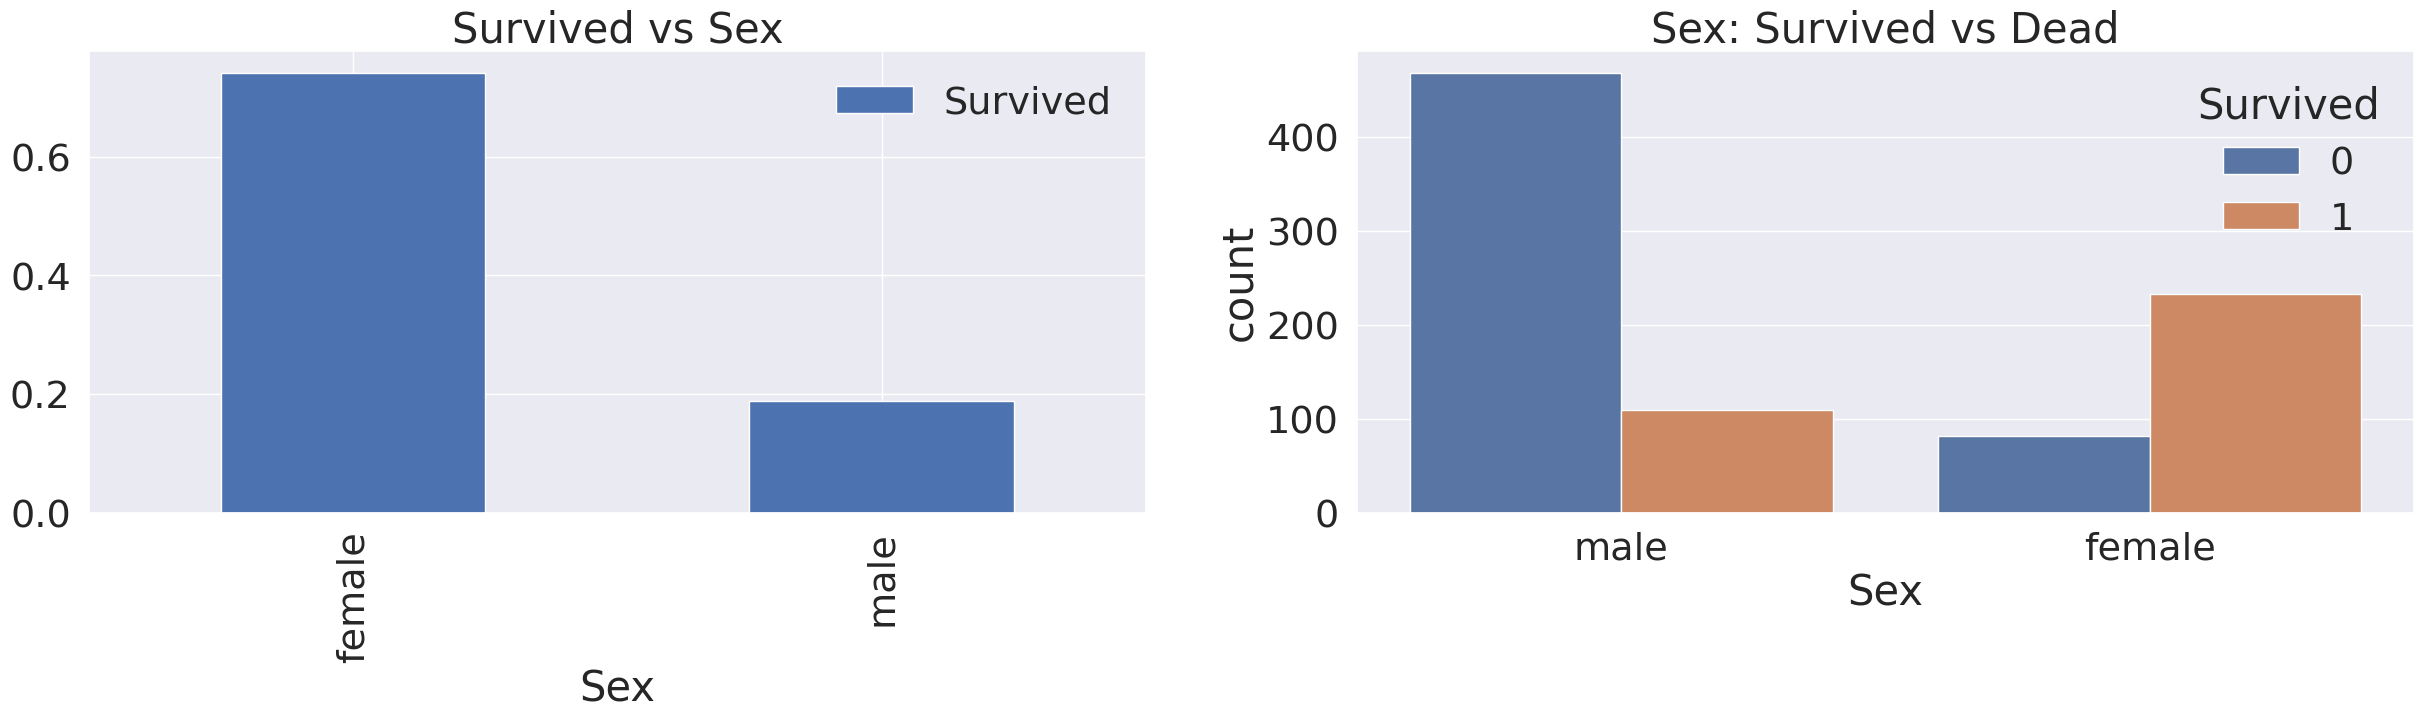

In [26]:
f, ax = plt.subplots(1,2, figsize=(30,6))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived',data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [27]:
df_train[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


<Axes: xlabel='Sex'>

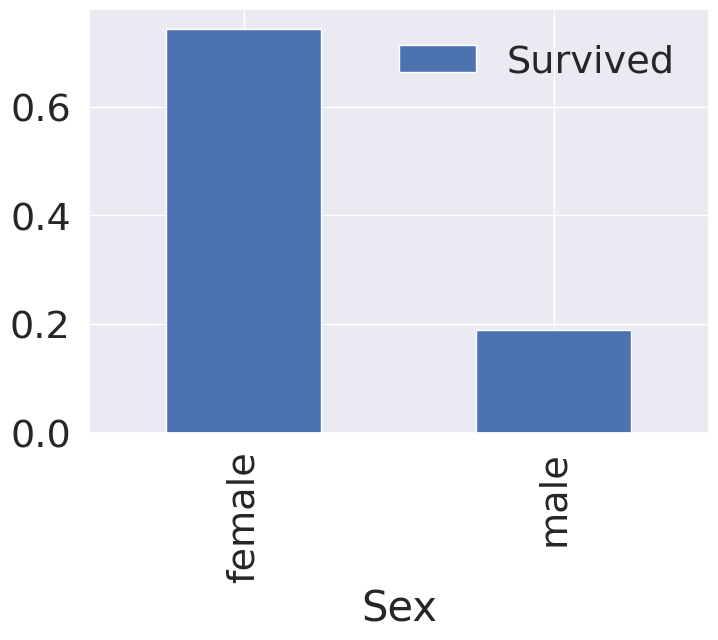

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient('summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [30]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


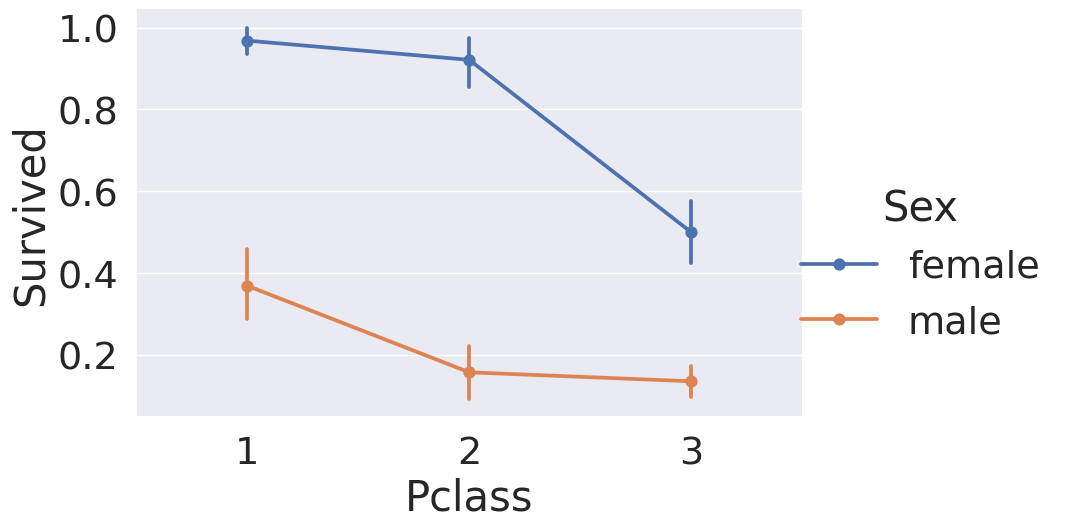

In [31]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='point')

Lady first,
Money brings survival?

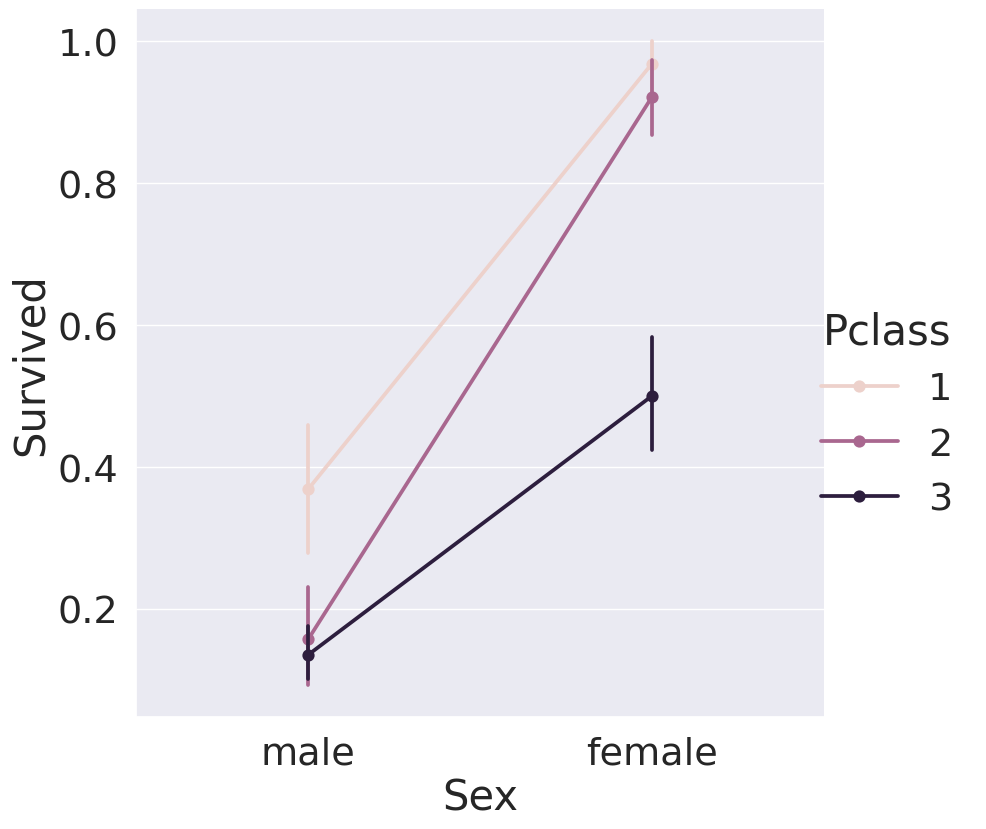

In [32]:
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = df_train, height = 9, aspect = 1, kind = 'point')

## 2.3 Age

In [33]:
print('제일 나이 많은 탑승객: {:.1f} 세'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} 세'.format(df_train['Age'].min()))
print('탑승객들의 평균 나이: {:.1f} 세'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 세
제일 어린 탑승객: 0.4 세
탑승객들의 평균 나이: 29.7 세


In [34]:
foo = df_train['Age']

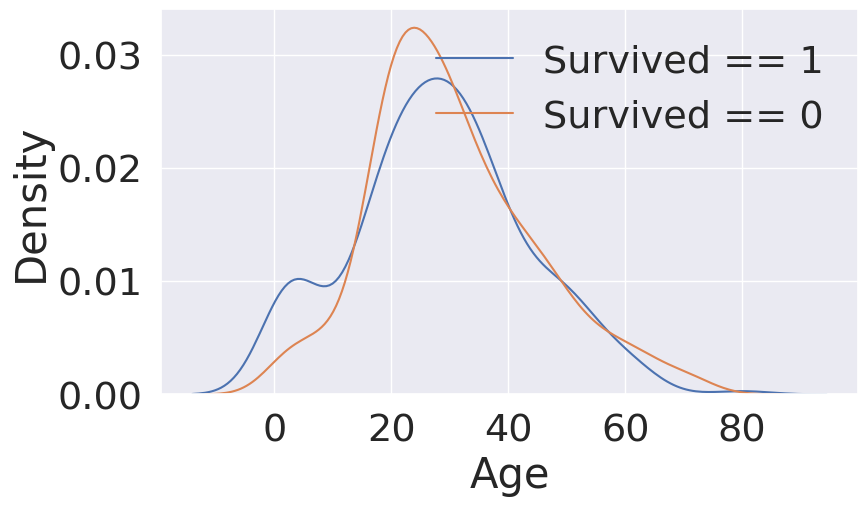

In [35]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax) # kdeplot은 히스토그램을 부드러운 곡선형태로 바꿔서 그래프를 그려주는 것이다.
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: >

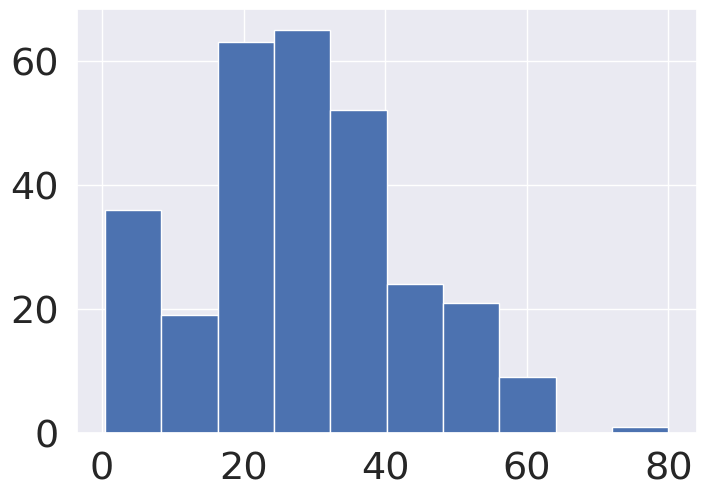

In [36]:
df_train[df_train['Survived'] == 1]['Age'].hist()

Text(0, 0.5, '')

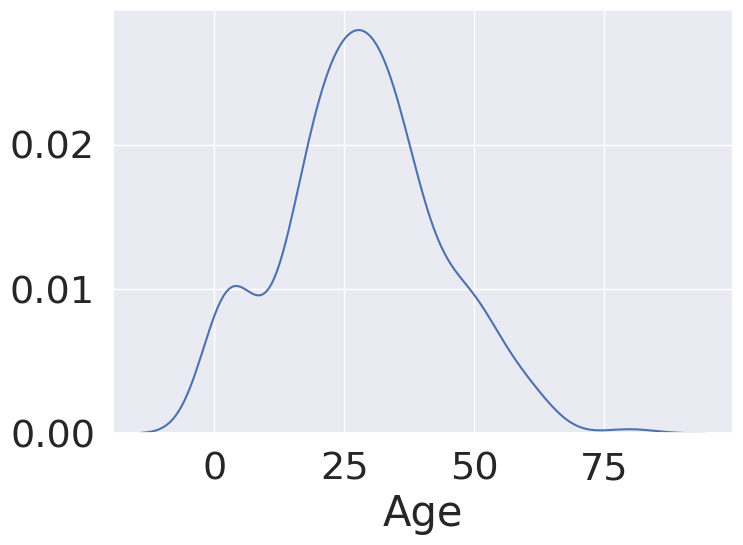

In [37]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
plt.ylabel('')

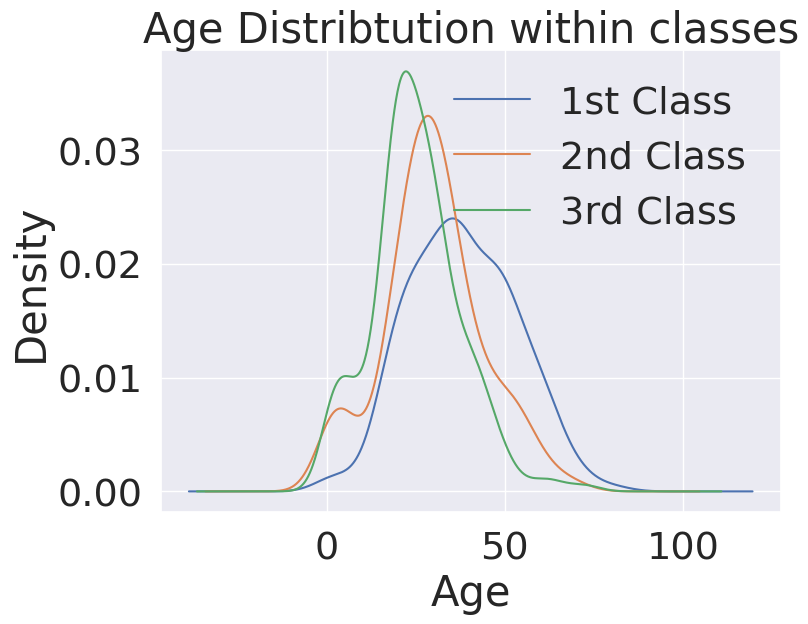

In [38]:
plt.figure(figsize=(8,6))
df_train["Age"][df_train['Pclass']== 1].plot(kind = 'kde')
df_train["Age"][df_train['Pclass']== 2].plot(kind = 'kde')
df_train["Age"][df_train['Pclass']== 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribtution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

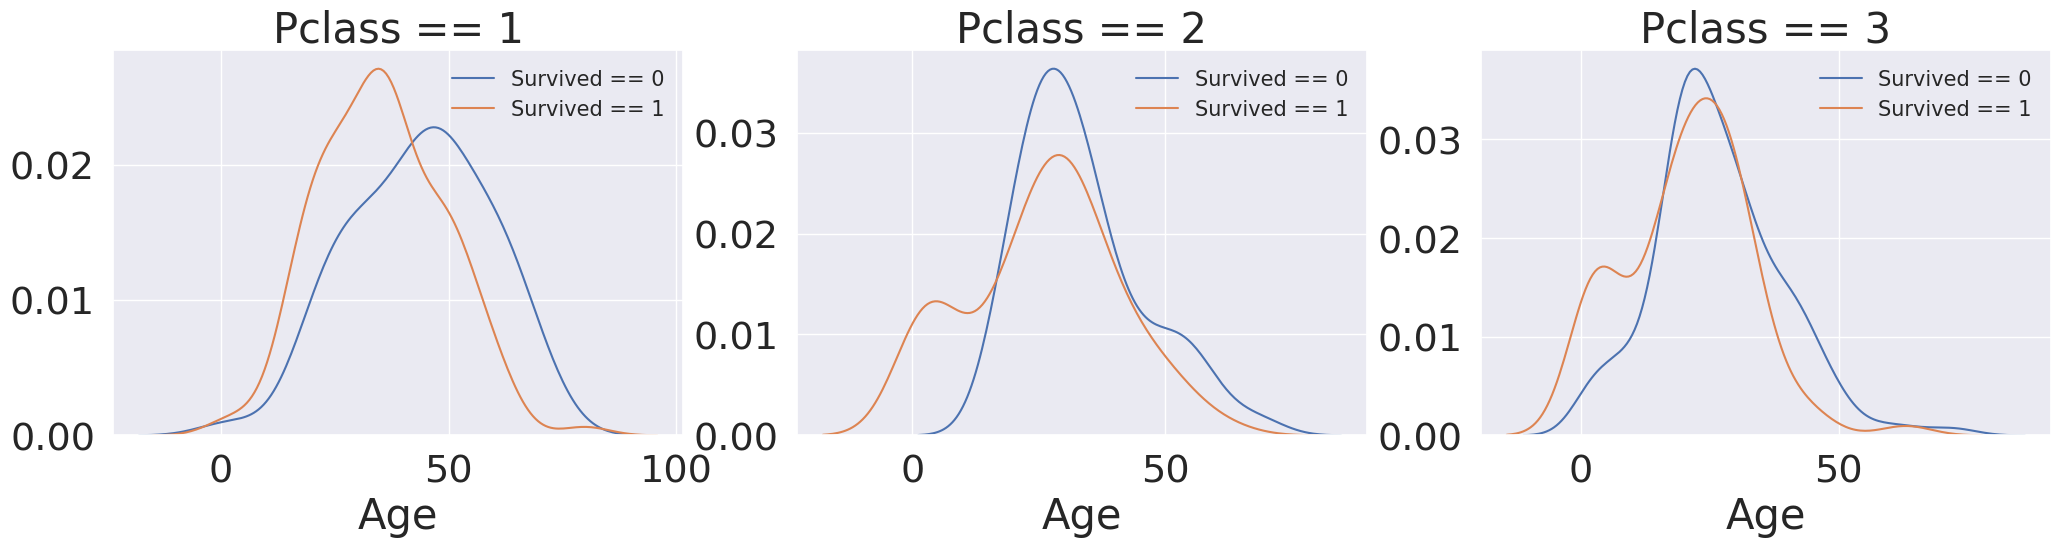

In [39]:
fig, ax = plt.subplots(1,3, figsize=(25,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax = ax[0]) # kdeplot은 히스토그램을 부드러운 곡선형태로 바꿔서 그래프를 그려주는 것이다.
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax[0])
ax[0].set_title('Pclass == 1')
ax[0].set_ylabel('')
ax[0].legend(['Survived == 0', 'Survived == 1'], prop={'size' : 15})
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax = ax[1]) # kdeplot은 히스토그램을 부드러운 곡선형태로 바꿔서 그래프를 그려주는 것이다.
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax[1])
ax[1].set_title('Pclass == 2')
ax[1].set_ylabel('')
ax[1].legend(['Survived == 0', 'Survived == 1'], prop={'size' : 15})
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax = ax[2]) # kdeplot은 히스토그램을 부드러운 곡선형태로 바꿔서 그래프를 그려주는 것이다.
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax[2])
ax[2].set_title('Pclass == 3')
ax[2].set_ylabel('')
ax[2].legend(['Survived == 0', 'Survived == 1'], prop={'size' : 15})
plt.show()

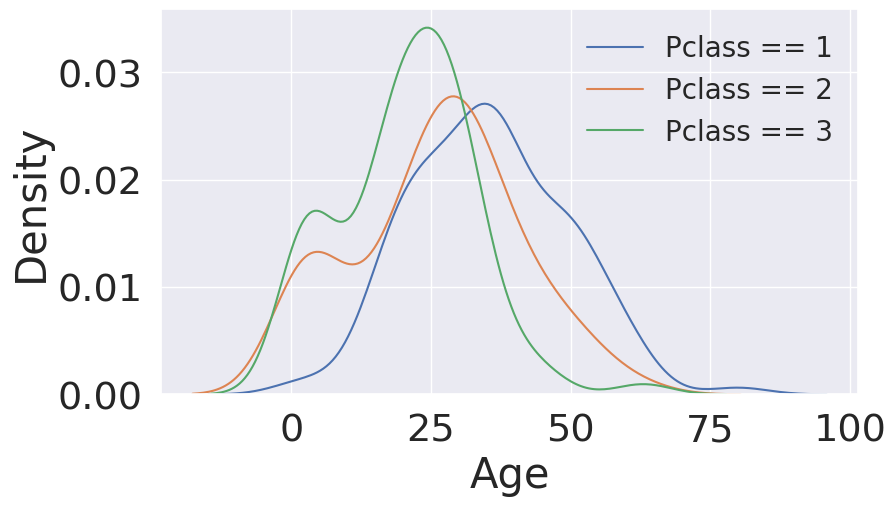

In [40]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax = ax) # kdeplot은 히스토그램을 부드러운 곡선형태로 바꿔서 그래프를 그려주는 것이다.
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax = ax)
plt.legend(['Pclass == 1', 'Pclass == 2', 'Pclass == 3'], prop={'size' : 20})
plt.show()

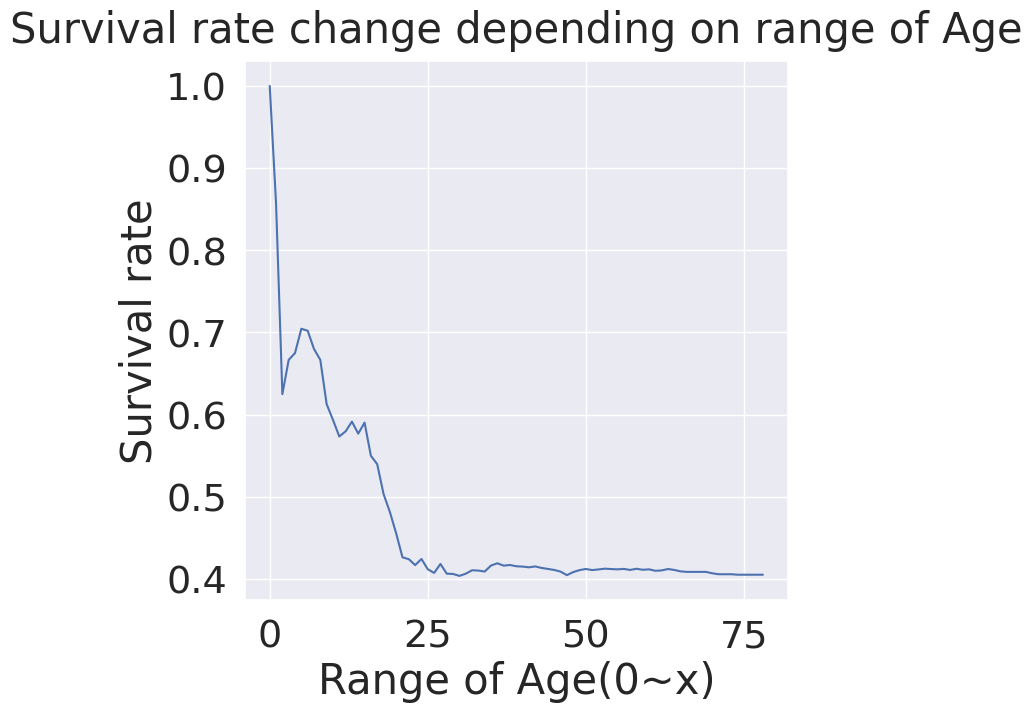

In [41]:
change_age_cummulate_ratio = []
for i in range(1, 80):
    change_age_cummulate_ratio.append(df_train[df_train["Age"]< i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']) )

plt.figure(figsize=(7,7))
plt.plot(change_age_cummulate_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [42]:
i = 10
df_train[df_train["Age"]< i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived'])
# 10살 보다 어린 사람들 중에서 생존자 수를 / 전체 인원수로 나눈 것이다.

0.6129032258064516

## Pclass, Sex, Age

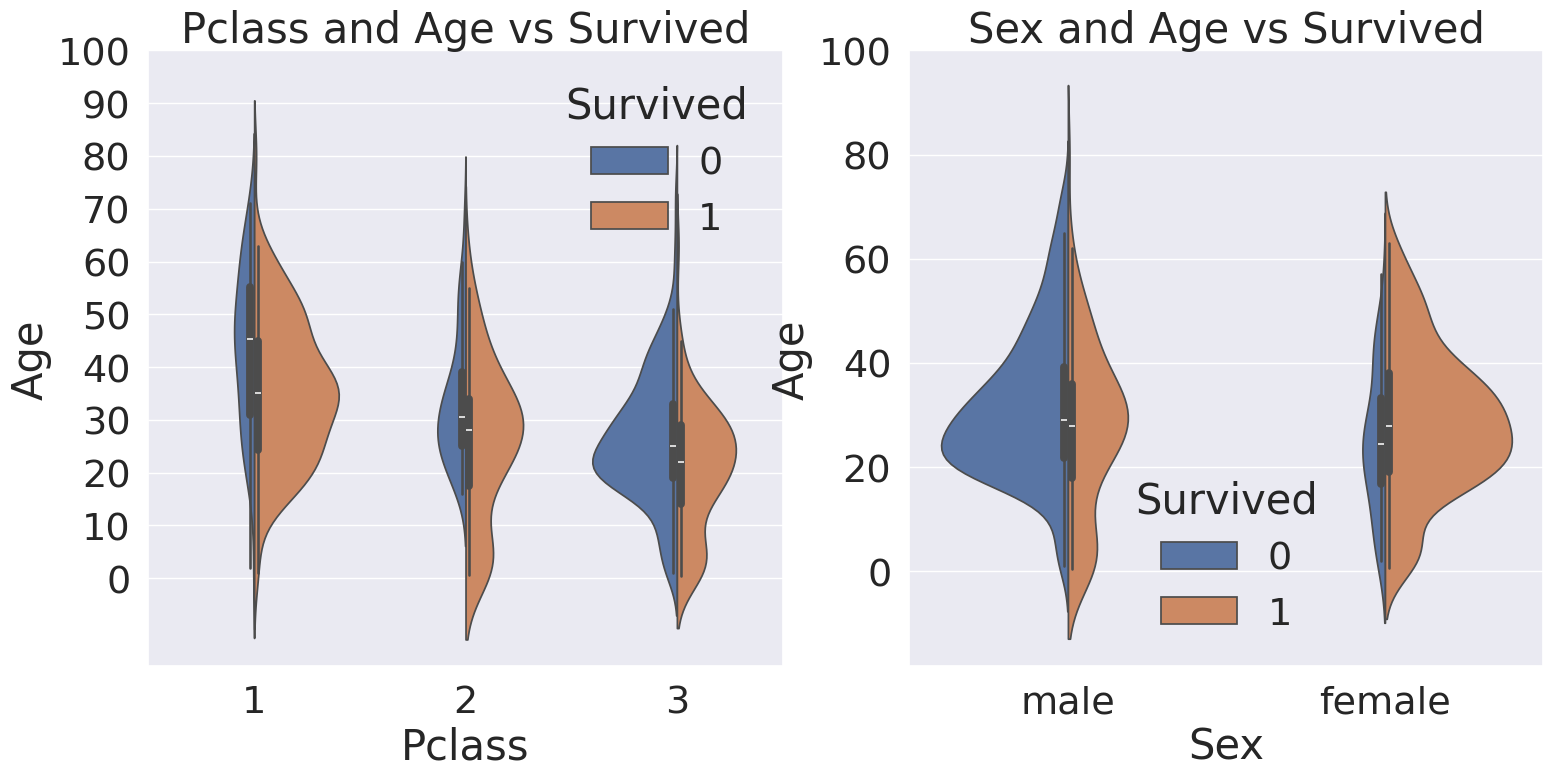

In [43]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x = 'Pclass', y='Age', hue = 'Survived', data = df_train, scale='count', split=True, ax = ax[0])
# 여기서 split을 True로 하면 하나의 x값에 생성되는 두 그래프를 합쳐준다. 비교해서 보기 쉽다.
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data = df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,20))
plt.show()

## Embarked

<Axes: xlabel='Embarked'>

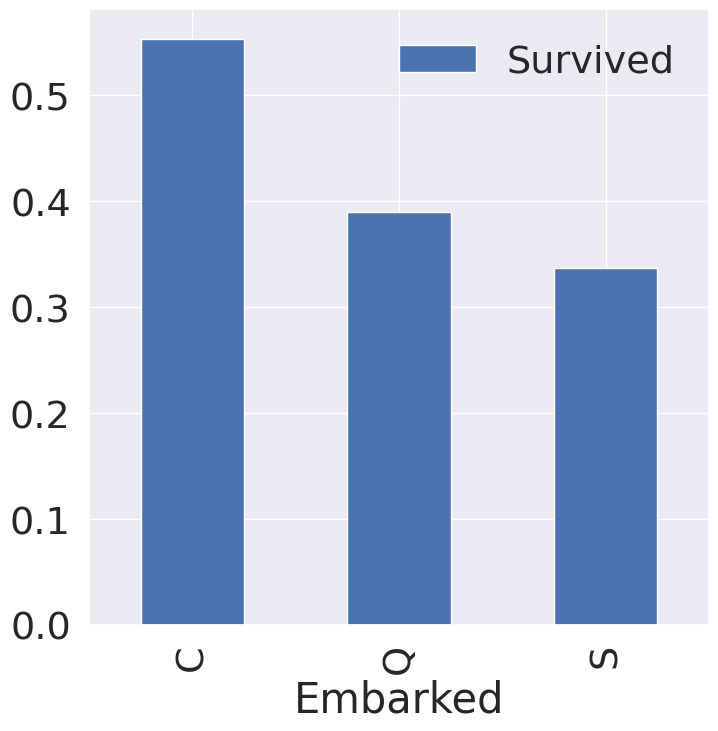

In [44]:
f, ax = plt.subplots(1,1, figsize = (8,8))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [45]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived')
# 여기서 sort_values는 안에 by뒤에 적힌 Survived라고 적으면 해당 열을 기준으로 정렬을 해주는 것이다. Embarked라고 하면 Embarked를 기준으로 정렬을 할 것이다.
# as_index = True라고 하면 인덱스들을 숫자가 아닌 그룹화된 열의 요소들을 사용하는 것이다.

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [46]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_index()
# sort_index라고 하면 행을 기준으로 정렬을 해준다.

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


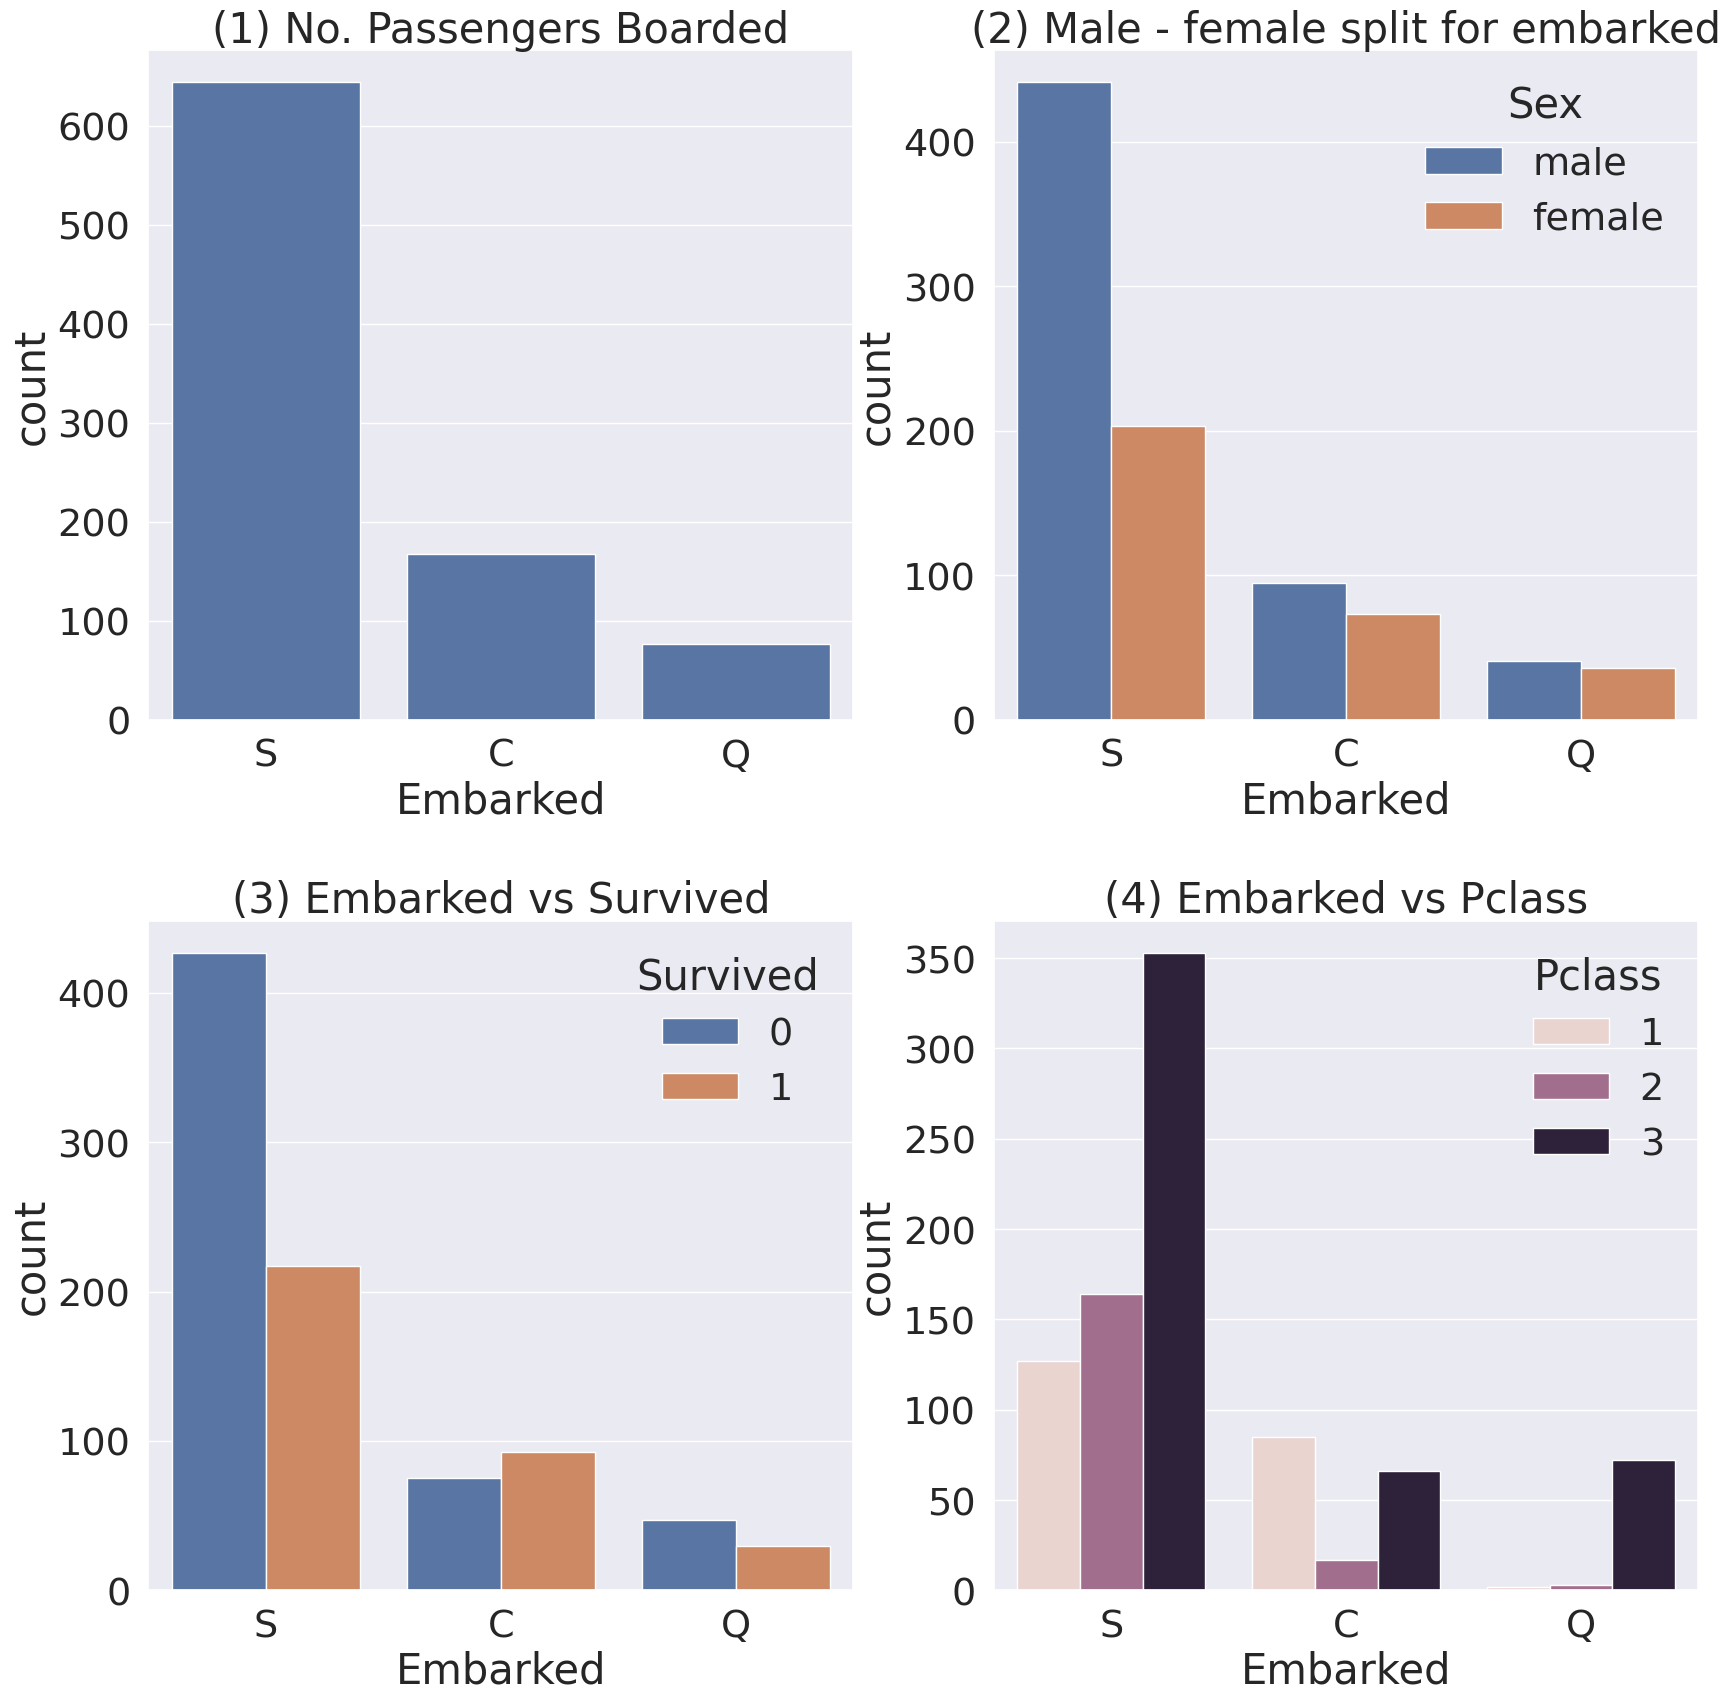

In [47]:
f,ax = plt.subplots(2,2, figsize = (20,20))
sns.countplot(x='Embarked', data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. Passengers Boarded')

sns.countplot(x='Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male - female split for embarked')

sns.countplot(x='Embarked', hue= 'Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace= 0.2, hspace=0.3)
plt.show()

## Family - SibSp + Parch

In [48]:
df_train['Family'] = df_train['SibSp'] + df_train["Parch"] + 1
# 시리즈끼리는 서로 더하는 것이 가능하다. 둘의 데이터 형식이 같은 경우만 가능하다. 
# SipSp -> 형제 자매, Parch -> 부모, 자식 그리고 +1을 해준 것은 자기자신도 포함을 한 것이다.

In [49]:
print('Maximum size of Family: ', df_train['Family'].max())
print('Minimum size of Family: ', df_train['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


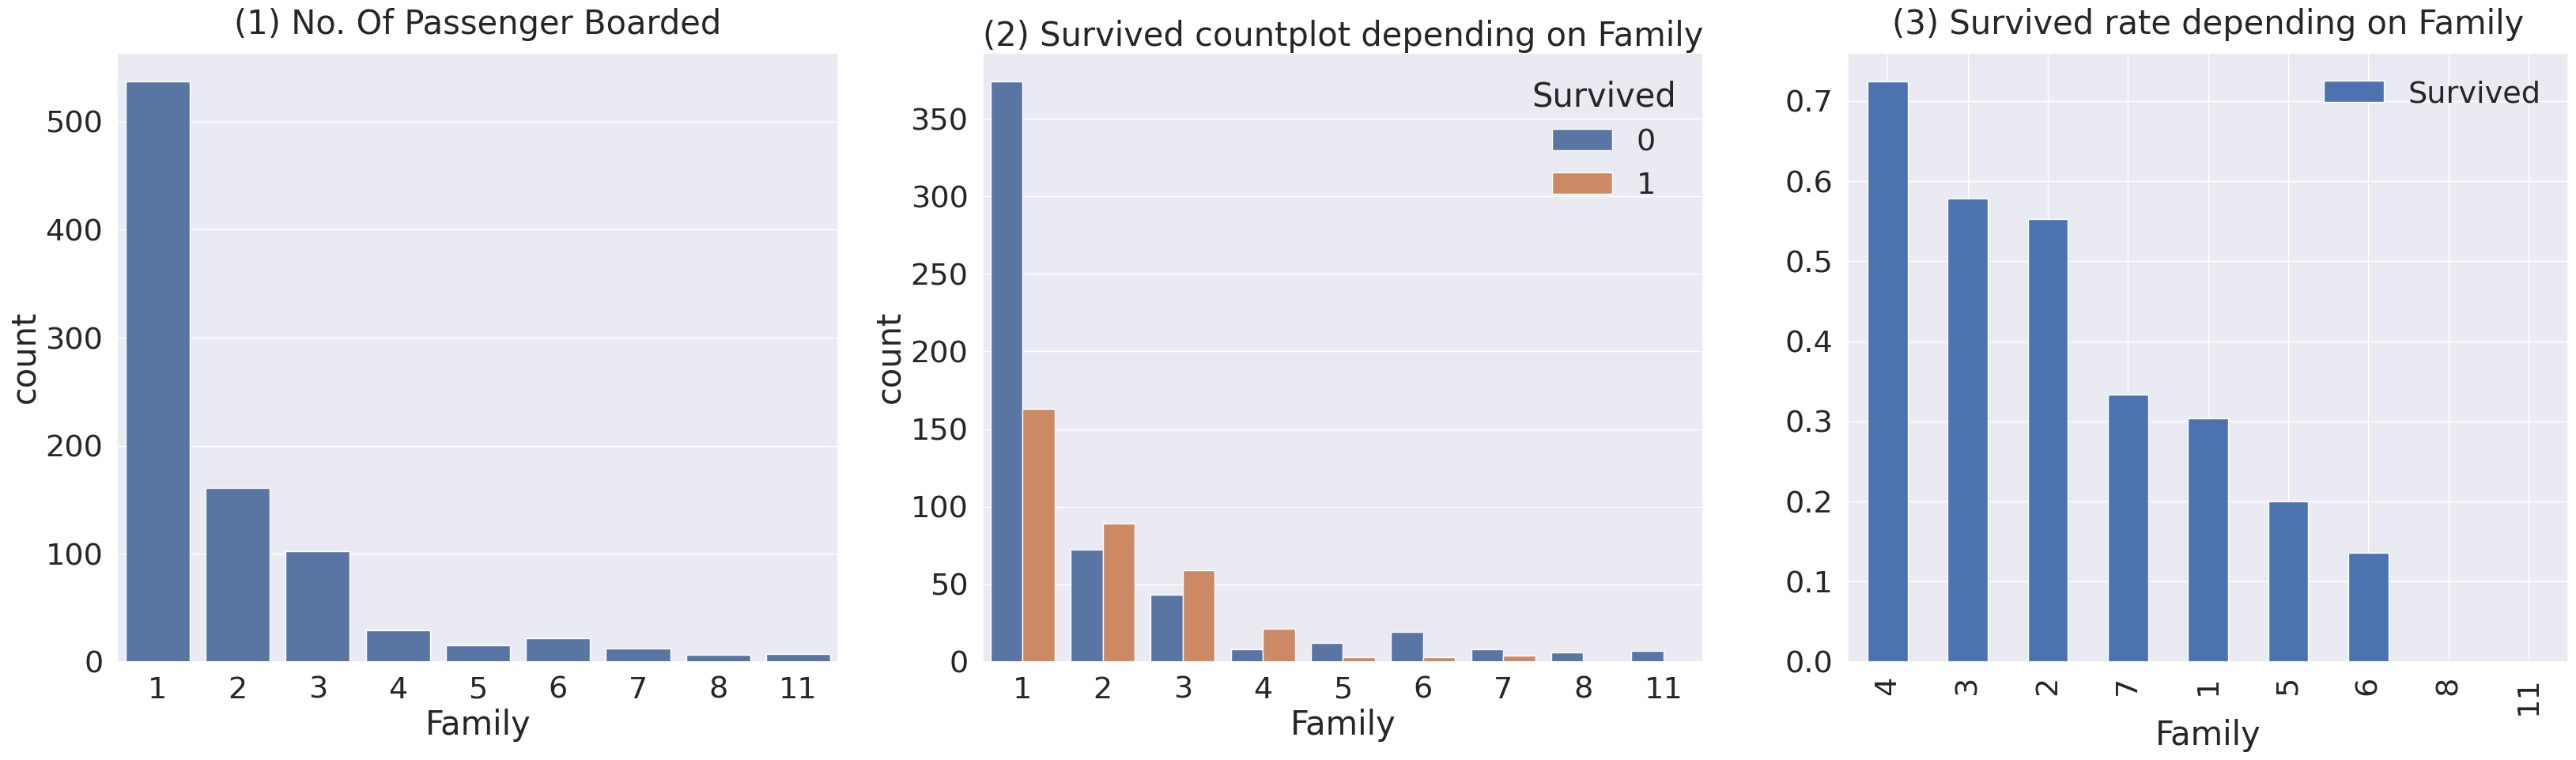

In [50]:
f, ax = plt.subplots(1,3, figsize = (40,10))
sns.countplot(x='Family', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot(x='Family', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('(2) Survived countplot depending on Family')

df_train[['Family', 'Survived']].groupby(['Family'], as_index=True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Family', y = 1.02)
plt.subplots_adjust(wspace = 0.2, hspace= 0.5)
plt.show()

## Fare

In [51]:
df_train['Fare'] = df_train2['Fare']

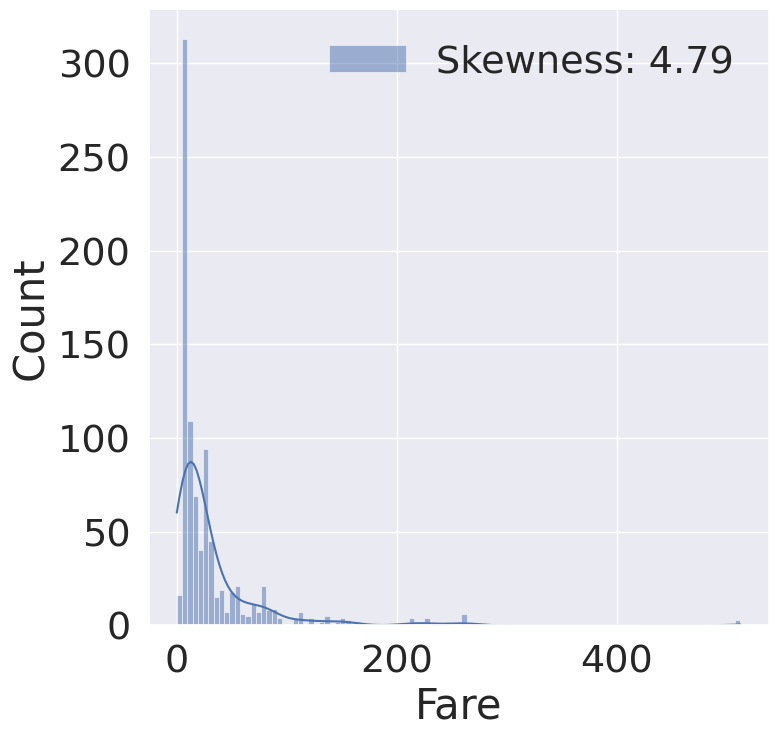

In [52]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.histplot(x='Fare', data=df_train, color='b', kde=True, label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

ax.legend(loc='best')
plt.show()

In [53]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
# 만약에 람다가 아닌 함수를 사용하고 싶을 때는 apply를 사용해서 적용하면된다.
# 지금해준 작업은 feature engineering을 해줌으로써 모델의 성능을 높여준 것이다.

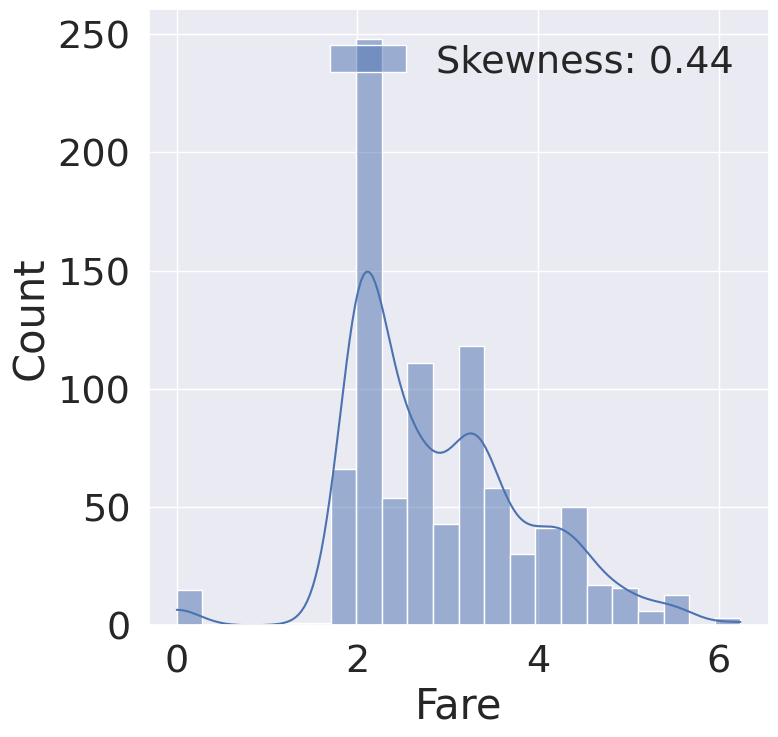

In [54]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.histplot(x='Fare', data=df_train, color='b', kde=True, label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

ax.legend(loc='best')
plt.show()

In [55]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [56]:
for col in df_train.columns:
    print(col, "'s null count: ", df_train[col].isnull().sum())

PassengerId 's null count:  0
Survived 's null count:  0
Pclass 's null count:  0
Name 's null count:  0
Sex 's null count:  0
Age 's null count:  177
SibSp 's null count:  0
Parch 's null count:  0
Ticket 's null count:  0
Fare 's null count:  0
Cabin 's null count:  687
Embarked 's null count:  2
Family 's null count:  0


In [57]:
df_train['Age'].isnull().sum()

177

In [58]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## 정규표현식을 이용한 특정 이름추출

In [59]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.')

In [60]:
pd.Series('Uruchurtu, Don. Manuel E').str.extract('([A-Za-z]*)\.')
# 이 정규표현식이 Uruchurtu이 아닌 Don이 출력된 이유는 알파벳들로 구성된 덩어리들을 찾는데, .뒤에 있는 문자열안에서 찾은 것이다.
# 만약에 \.이 없다면 문자열로 구성된 첫 번째 덩어리를 추출해줄 것이다.
# 그리고 \.을 작성하면 .바로 앞에 있는 문자열 덩어리가 우선순위가 된다.

,0
0,Don


In [61]:
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.')

In [62]:
df_train.iloc[30:60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,3.322183,NaN,C,1,Don
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,4.987167,B78,C,2,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,2.047693,NaN,Q,1,Miss
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,2.351375,NaN,S,1,Mr
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,4.408800,NaN,C,2,Mr
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,3.951244,NaN,S,2,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,2.085672,NaN,S,1,Mr
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,2.890372,NaN,S,3,Miss
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,2.419630,NaN,C,2,Miss


In [63]:
df_train['Initial'].value_counts()

Initial
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [64]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [65]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Capt','Sir','Don','Dona','Rev'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Mr','Mr','Mr','Mr','Other'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Capt','Sir','Don','Dona','Rev'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Mr','Mr','Mr','Mr','Other'], inplace=True)

In [66]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [67]:
pd.crosstab(df_train['Initial'], df_train['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


<Axes: xlabel='Initial'>

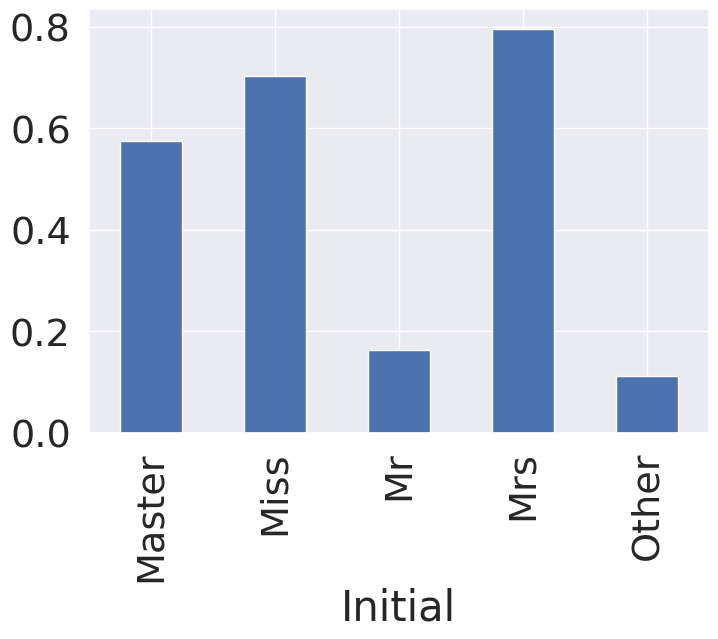

In [68]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [69]:
df_all = pd.concat([df_train, df_test])

In [70]:
df_all.groupby('Initial')['Age'].mean()

Initial
Master     5.482642
Miss      21.834533
Mr        32.556397
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

In [71]:
((df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'))

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [72]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5

In [73]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 45
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5

In [74]:
df_train.loc[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial


In [75]:
df_train['Age'].isnull().sum()

0

In [76]:
df_test['Age'].isnull().sum()

0

In [77]:
df_train.loc[df_train['Embarked'].isnull()]
# 이렇게 하면 널값으로 존재하는 요소들을 출력해주고 뒤에 ,하고 특정 열을 입력을 하면 그 열만 볼 수 있다. df_train.loc[df_train['Embarked'].isnull(), 'Age']
# 이렇게 널값의 양이 적은 경우에는 가장 많은 요소에 입력을 해주면된다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN,1,Mrs


널값을 처리해줄 때는 이게 numeric한 값인지 categorical한 값인지를 판단해서 처리하는 것도 필요

In [78]:
df_train.shape # shape은 속성이여서 메서드처럼 괄호를 적으면 안된다.
# 지금 shape을 해서 행열의 크기를 알아본 이유는 위에 널값이 무시해도될 정도의 양인지 체크하기 위함.

(891, 14)

In [79]:
df_train['Embarked'].fillna('S', inplace = True)

그림을 그리는 많은 방법이 있지만 나는 f, ax 변수에 subplot으로 그림을 그려주는 방식이 좋은 것같다. 

Text(0.5, 0, '')

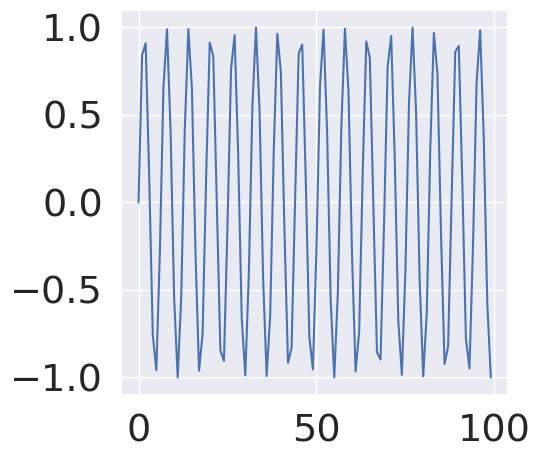

In [80]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b) 
# 이렇게 axes로 그림을 그려줄 때는 set_뒤에 xlabel을 작성해야 하지만 plt로 그림을 그려줄 때는 xlabel만 작성해주면 된다. 
ax.set_xlabel('')